In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results_path = 'Results_ALL.xlsx'
results_df = pd.read_excel(results_path, dtype = str)

In [3]:
results_df = results_df.rename(columns={
    'Hora de inicio': 'start_date',
    'Hora de finalización': 'end_date',
    'Selecciona la asignatura':'subject',
    'Selecciona la pregunta': 'question',
    'Conversación con ChatGPT': 'conversation_ChatGPT',
    '¿Cuántas preguntas has realizado a ChatGPT para obtener la mejor respuesta?': 'numTries_ChatGPT',
    'Conversación con Gemini': 'conversation_Gemini',
    '¿Cuántas preguntas has realizado a Gemini para obtener la mejor respuesta?': 'numTries_Gemini',
    'Conversación con Copilot': 'conversation_Copilot',
    '¿Cuántas preguntas has realizado a Copilot para obtener la mejor respuesta?': 'numTries_Copilot',
    '¿Te ha ayudado ChatGPT a responder a la pregunta?': 'rating_ChatGPT',
    '¿Te ha ayudado Gemini a responder a la pregunta?': 'rating_Gemini',
    '¿Te ha ayudado Copilot a responder a la pregunta?': 'rating_Copilot',
    'Indica tu respuesta a la pregunta':'final_answer'
}).drop(columns=results_df.columns, errors='ignore')

In [4]:
results_df = results_df[results_df['subject'].isin(["Ampliación de Ingeniería del Software","Desarrollo de Aplicaciones Distribuidas"])]

In [5]:
results_df['numTries_ChatGPT'] = results_df['numTries_ChatGPT'].astype(int)
results_df['numTries_Gemini'] = results_df['numTries_Gemini'].astype(int)
results_df['numTries_Copilot'] = results_df['numTries_Copilot'].astype(int)

In [6]:
grouped_questions = ["Pregunta corta", "Pregunta de explicar código", "Pregunta de escribir código"]
def group_questions(question):
    if question in ["Pregunta 1", "Pregunta 2"]: return grouped_questions[0]
    if question in ["Pregunta 3", "Pregunta 4"]: return grouped_questions[1]
    if question in ["Pregunta 5", "Pregunta 6"]: return grouped_questions[2]
results_df['question_grouped'] = results_df['question'].apply(group_questions)

In [7]:
response_map = {
 'Si. Me ha dado la mejor respuesta' : 'Mejor respuesta',
 'Si. Me ha dado una respuesta correcta, pero menos completa que otras IAs': 'Correcta, pero no tan completa',
 'No. Me ha contestado correctamente, pero no responde a la pregunta que le he hecho': 'No responde a la pregunta',
 'No. Me ha contestado de forma errónea': 'Responde incorrectamente'
}
results_df['rating_ChatGPT_reduced'] = results_df['rating_ChatGPT'].apply(lambda rating: response_map[rating])
results_df['rating_Gemini_reduced'] = results_df['rating_Gemini'].apply(lambda rating: response_map[rating])
results_df['rating_Copilot_reduced'] = results_df['rating_Copilot'].apply(lambda rating: response_map[rating])

In [8]:
results_df.head()

,start_date,end_date,subject,question,conversation_ChatGPT,numTries_ChatGPT,conversation_Gemini,numTries_Gemini,conversation_Copilot,numTries_Copilot,rating_ChatGPT,rating_Copilot,rating_Gemini,question_grouped,rating_ChatGPT_reduced,rating_Gemini_reduced,rating_Copilot_reduced
235,2024-04-16 09:36:07,2024-04-16 09:40:22,Desarrollo de Aplicaciones Distribuidas,Pregunta 3,El resultado esperado cuando se realiza una so...,1,El resultado esperado cuando se realiza una so...,1,El código que proporcionas es un controlador R...,1,"Si. Me ha dado una respuesta correcta, pero me...","Si. Me ha dado una respuesta correcta, pero me...",Si. Me ha dado la mejor respuesta,Pregunta de explicar código,"Correcta, pero no tan completa",Mejor respuesta,"Correcta, pero no tan completa"
425,2024-04-23 13:15:08,2024-04-23 13:20:11,Desarrollo de Aplicaciones Distribuidas,Pregunta 1,Pregunta 1 (Pregunta de teoría con respuesta d...,1,Pregunta 1 (Pregunta de teoría con respuesta d...,1,Pregunta 1 (Pregunta de teoría con respuesta d...,1,Si. Me ha dado la mejor respuesta,Si. Me ha dado la mejor respuesta,Si. Me ha dado la mejor respuesta,Pregunta corta,Mejor respuesta,Mejor respuesta,Mejor respuesta
426,2024-04-23 13:18:22,2024-04-23 13:24:41,Desarrollo de Aplicaciones Distribuidas,Pregunta 1,Existen varias formas de lograr la escalabilid...,1,\nExisten dos enfoques principales para lograr...,2,Existen principalmente dos formas de lograr la...,1,"Si. Me ha dado una respuesta correcta, pero me...","Si. Me ha dado una respuesta correcta, pero me...",Si. Me ha dado la mejor respuesta,Pregunta corta,"Correcta, pero no tan completa",Mejor respuesta,"Correcta, pero no tan completa"
427,2024-04-23 13:20:56,2024-04-23 13:25:28,Desarrollo de Aplicaciones Distribuidas,Pregunta 2,Pregunta 2 (Pregunta de teoría con respuesta d...,1,Pregunta 2 (Pregunta de teoría con respuesta d...,1,Pregunta 2 (Pregunta de teoría con respuesta d...,2,Si. Me ha dado la mejor respuesta,Si. Me ha dado la mejor respuesta,"Si. Me ha dado una respuesta correcta, pero me...",Pregunta corta,Mejor respuesta,"Correcta, pero no tan completa",Mejor respuesta
428,2024-04-23 13:24:48,2024-04-23 13:27:36,Desarrollo de Aplicaciones Distribuidas,Pregunta 2,La mejor opción sería utilizar un sistema de m...,2,La mejor tecnología de comunicación para comun...,1,La mejor opción para este escenario sería util...,1,Si. Me ha dado la mejor respuesta,"Si. Me ha dado una respuesta correcta, pero me...","Si. Me ha dado una respuesta correcta, pero me...",Pregunta corta,Mejor respuesta,"Correcta, pero no tan completa","Correcta, pero no tan completa"


In [9]:
def numTries_perQuestion(question):
    df = results_df
    if question != 'All':
        df = results_df[results_df['question_grouped']==question]
    results = [
        question,
        df['numTries_ChatGPT'].mean(),
        df[df['numTries_Gemini']>0]['numTries_Gemini'].mean(),
        #df['numTries_Gemini'].mean(),
        df['numTries_Copilot'].mean()
    ]
    return results

# Número de preguntas hechas a cada IA (media)

Comentarios:
- Hay 13 alumnos que en Gemini tienen un 0 porque tuvieron problemas con su cuenta de Google

Observaciones preliminares:
- En general, la media de nº de preguntas para todas las IAs es de ~1.26 intentos de pregunta
- Las preguntas de escribir código (5 y 6) son las que menos preguntas de media han requerido (salvo para Copilot)

In [10]:
len(results_df[results_df['numTries_Gemini']==0])

13

In [11]:
rows = [numTries_perQuestion("All")] + [numTries_perQuestion(q) for q in grouped_questions]
pd.DataFrame(rows,columns=['Question','ChatGPT','Gemini','Copilot']).round(decimals=3)

,Question,ChatGPT,Gemini,Copilot
0,All,1.301,1.200,1.223
1,Pregunta corta,1.159,1.128,1.205
2,Pregunta de explicar código,1.111,1.125,1.111
3,Pregunta de escribir código,1.870,1.474,1.435


# Cuánto ha ayudado cada IA en cada pregunta

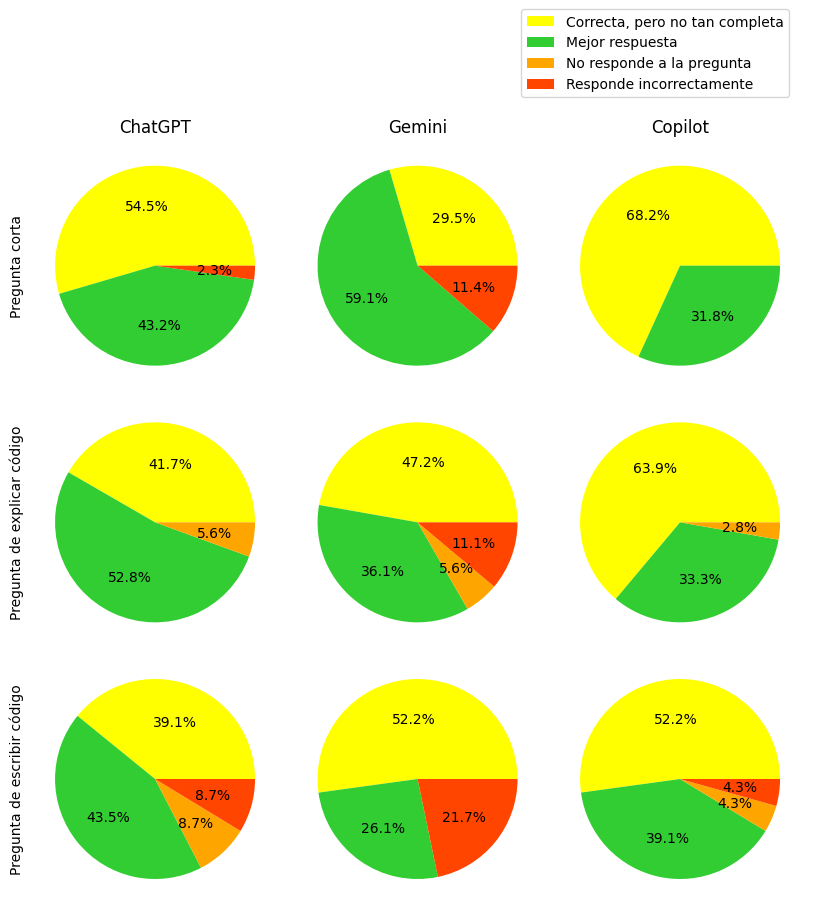

In [12]:
colors = {
    'Mejor respuesta':  'limegreen',
    'Correcta, pero no tan completa': 'yellow', 
    'No responde a la pregunta': 'orange', 
    'Responde incorrectamente': 'orangered'
}

def ia_rating_pieChart(ia, question, ax):
    df = results_df[results_df['question_grouped']==question].groupby(['rating_'+ia+'_reduced']).count()
    title = ia if question == "Pregunta corta" else ""
    ylabel = question if ia == "ChatGPT" else ""
    showLegend = question == "Pregunta de escribir código" and ia == "Copilot"
    df.plot.pie(
        y='question_grouped', ylabel=ylabel, autopct='%1.1f%%', labels=None,#labeldistance=None,
        title=title,
        ax=ax, legend=showLegend, colors=[colors[name] for name in df.index]
    )
    if showLegend: ax.legend(df.index,loc='lower center', bbox_to_anchor=(0.4, 3.2, 0, 0))
    return df
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
fig.subplots_adjust(hspace=0, wspace=0.05)

row,col = 0,0
for question in grouped_questions:
    for ia in ['ChatGPT','Gemini','Copilot']:
        ia_rating_pieChart(ia, question, axes[row,col])
        if col == 2:
            col = 0
            row = row + 1
        else:
            col+=1
plt.savefig('IA_comparative_per_question_type.png', bbox_inches='tight')